<a href="https://colab.research.google.com/github/tata0409/MachineLearning/blob/main/Tokenization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tokenization

Splitting a string into a list of words

In [ ]:
text = "I like programming and I like exploring nature"
tokens = text.split()
print(tokens)

['I', 'like', 'programming', 'and', 'I', 'like', 'exploring', 'nature']


Giving each word a unique ID and creating a dictionary with the words and their IDs

In [ ]:
vocab = {}
ids = []
next_id = 0
for t in tokens:
  if t not in vocab:
    vocab[t] = next_id
    next_id += 1
  ids.append(vocab[t])

print("Tokens:", tokens)
print("Vocab:", vocab)
print("IDs:", ids)

Tokens: ['I', 'like', 'programming', 'and', 'I', 'like', 'exploring', 'nature']
Vocab: {'I': 0, 'like': 1, 'programming': 2, 'and': 3, 'exploring': 4, 'nature': 5}
IDs: [0, 1, 2, 3, 0, 1, 4, 5]


#Embeding

In [ ]:
import numpy as np

emb = {
    'cat': np.array([1.5, -0.4, 7.2, 19.6, 20.2]),
    'dog': np.array([1.7, -0.3, 6.9, 19.1, 21.1]),
    'car': np.array([81.6, -72.1, 16, -20.2, 102])
}

def cosine_sim(a, b):
  return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b)) # cos(γ)

print('Similarity of "cat" and "dog":', round(cosine_sim(emb['cat'], emb['dog']), 3))
print('Similarity of "cat" and "car":', round(cosine_sim(emb['cat'], emb['car']), 3))

Similarity of "cat" and "dog": 0.999
Similarity of "cat" and "car": 0.438


Importing needed modules and creaing lists and array for words and vectors

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

words = list(emb.keys())
vectors = np.array(list(emb.values()))

print("words",words)
print("list(emb.values())", list(emb.values()))
print("vectors", vectors)

words ['cat', 'dog', 'car']
list(emb.values()) [array([ 1.5, -0.4,  7.2, 19.6, 20.2]), array([ 1.7, -0.3,  6.9, 19.1, 21.1]), array([ 81.6, -72.1,  16. , -20.2, 102. ])]
vectors [[  1.5  -0.4   7.2  19.6  20.2]
 [  1.7  -0.3   6.9  19.1  21.1]
 [ 81.6 -72.1  16.  -20.2 102. ]]


Reducing vectors to 2D

In [ ]:
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(vectors)

Creating and showing the graph

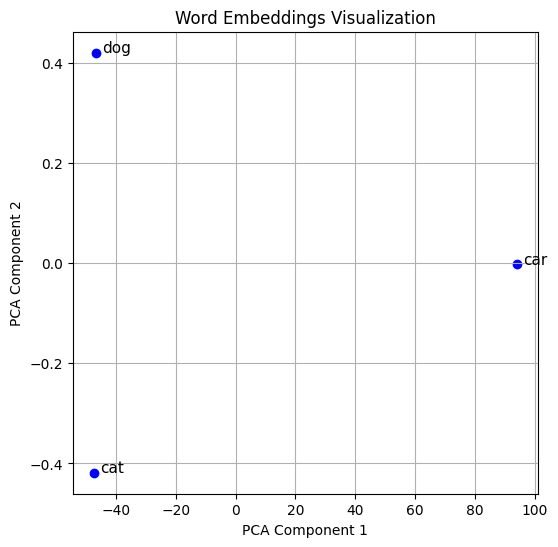

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(reduced_vectors[:,0], reduced_vectors[:,1], color="blue")

for i in range(len(words)):
    plt.text(reduced_vectors[i, 0]+2, reduced_vectors[i, 1], words[i], fontsize=11)

plt.title('Word Embeddings Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.show()

#Attention - which words are important and not

In [ ]:
import numpy as np

X = np.array([
  [1.0, 0.0, 0.5, 0.0], # token A
  [0.0, 1.0, 0.0, 0.5], # token B
  [1.0, 1.0, 0.0, 0.0], # token C
])

# Initializing weight matrices
np.random.seed(1)
Wq = np.random.randn(4, 4) * 0.1
Wk = np.random.randn(4, 4) * 0.1
Wv = np.random.randn(4, 4) * 0.1

# Calculating Query, Key, and Value
Q = X.dot(Wq)
K = X.dot(Wk)
V = X.dot(Wv)

# print(Q.shape)
# Calculating attention scores
d_k = Q.shape[-1]
score = Q.dot(K.T) / np.sqrt(d_k)

# softmax function
def softmax(x):
  e_x = np.exp(x - np.max(x, axis=-1, keepdims=True))
  return e_x / e_x.sum(axis=-1, keepdims=True)

# Converting raw attention scores to attention weights
weights = softmax(score)

attn_output = weights.dot(V)

# score - raw correspondence between requests and keys(can be different)
print("Score (Q.dot(K.T) / np.sqrt(d_k)):\n", np.round(score, 3))

# weights - нnormalized value - how much attention each word needds
print("Attention weight (after softmax)\n", np.round(weights, 3))

# attn_output - a new token representation that takes into account other words
print("Attention output (shape {})\n".format(attn_output.shape), np.round(attn_output, 3))

# f"qwerty {n}"
# "qwerty {}".format(n)

Score (Q.dot(K.T) / np.sqrt(d_k)):
 [[ 0.006 -0.019 -0.023]
 [ 0.015 -0.017 -0.004]
 [ 0.02  -0.035 -0.024]]
Attention weight (after softmax)
 [[0.339 0.331 0.33 ]
 [0.339 0.328 0.333]
 [0.344 0.326 0.33 ]]
Attention output (shape (3, 4))
 [[-0.122 -0.067  0.055  0.112]
 [-0.122 -0.067  0.055  0.111]
 [-0.122 -0.067  0.054  0.111]]


#Transformer


Transformer Structure:


Input words (after tokenization) -> Embiding (words-> number vectors) -> *Multiple layers* Self-Attention (which words are importnat for each other) -> Normalization (stability) -> Feed Forward (specifying reasults) -> Exit (next word / answer)

Self-Attention

Every word looks at the other words

Q - what looking for

K - what is

V - meaning

Example:  
"Cat sits on a carpet."  
"Cat" pays attention to "sits", but not much to "carpet".

In [ ]:
import numpy as np

words = ["кіт", "сидить", "килимі"]

X = np.array([
    [1.0, 0.0, 0.5],
    [0.9, 0.1, 0.3],
    [0.2, 0.9, 0.0]
])

Wq = np.random.randn(3, 3) * 0.1
Wk = np.random.randn(3, 3) * 0.1
Wv = np.random.randn(3, 3) * 0.1

Q = X.dot(Wq)
K = X.dot(Wk)
V = X.dot(Wv)


scores = Q @ K.T / np.sqrt(K.shape[-1])
weights = np.exp(scores) / np.sum(np.exp(scores), axis=-1, keepdims=True)
attention_output = weights.dot(V)


print("Attention matrix:\n", np.round(weights, 3))
print("Result after attention:\n", np.round(attention_output, 3))

Attention matrix:
 [[0.333 0.333 0.334]
 [0.333 0.333 0.334]
 [0.333 0.333 0.333]]
Result after attention:
 [[0.037 0.081 0.144]
 [0.037 0.082 0.145]
 [0.037 0.082 0.145]]


# Проєкт "Шкільний помічник пошуку"

In [ ]:
from sentence_transformers import SentenceTransformer, util
import numpy as np

# база знань
texts = [
    "Сонце - це зоря, яка знаходиться в ценрі нашої Сонячної системи.",
    "Кисень необхідний для дихання живих організмів.",
    "Вода замерзає при температурі в 0 градусів Цельсія",
    "Теорема Піфагора використовується для прямокутних трикутників.",
    "Тараз Шевченко - відомий український поет і художник.",
    "Дерева виробляють кисень, яким ми дихаємо.",
    "Амазонка є найдовшою та найповноводнішою річкою світу.",
    "Коралові рифи створюються з колоній дрібних морських тварин.",
    "Соняшник обертається за рухом сонця протягом дня.",
    "Полярні ведмеді мають чорну шкіру під білим хутром.",
    "Бджоли відіграють важливу роль у запиленні рослин.",
    "У пустелі Сахара вдень температура може перевищувати 50 градусів.",
    "Дельфіни здатні спати, залишаючи одне око відкритим.",
    "Гори займають близько чверті поверхні Землі.",
    "Райдуга виникає, коли сонячне світло заломлюється у краплях дощу."
]

Ембідінг: створюємо модель для перетворення тексту в числа

In [ ]:
model = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2')

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/645 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/471M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
embeddings = model.encode(texts, convert_to_tensor=True)
print("Кількість речень:", len(texts))
print("Розмір векторів:", embeddings.shape)

Кількість речень: 15
Розмір векторів: torch.Size([15, 384])


In [ ]:
print(embeddings)

tensor([[ 0.0729,  0.3366,  0.0452,  ..., -0.3677, -0.2964,  0.0479],
        [-0.1071,  0.3267, -0.1032,  ...,  0.0195,  0.0757,  0.0507],
        [-0.2313,  0.2721,  0.1937,  ..., -0.2226, -0.2895,  0.2334],
        ...,
        [-0.0014, -0.3931,  0.2118,  ...,  0.1334,  0.5379, -0.0972],
        [-0.0406, -0.1506,  0.1846,  ..., -0.0361,  0.0024, -0.2640],
        [ 0.0748,  0.0917,  0.1567,  ...,  0.0067,  0.1485,  0.1404]])


In [ ]:
query = input("Введіть своє питання: ")
query_embedding = model.encode(query, convert_to_tensor=True)

Введіть своє питання: Температура замерзання?


In [ ]:
cosine_scores = util.cos_sim(query_embedding, embeddings)[0]
print(cosine_scores)

tensor([ 0.0408,  0.1389,  0.7591, -0.0490, -0.0445,  0.0620, -0.0223, -0.0475,
         0.1156,  0.3524, -0.0106,  0.3295, -0.0275,  0.1071,  0.4444])


In [ ]:
best_match_idx = np.argmax(cosine_scores)

print(f"Краща відповідь на питання '{query}':")
print(texts[best_match_idx])

Краща відповідь на питання 'Температура замерзання?':
Вода замерзає при температурі в 0 градусів Цельсія


In [ ]:
for i, score in enumerate(cosine_scores):
    print(f"{texts[i]} — схожість: {score:.2f}")

Сонце - це зоря, яка знаходиться в ценрі нашої Сонячної системи. — схожість: -0.03
Кисень необхідний для дихання живих організмів. — схожість: 0.03
Вода замерзає при температурі в 0 градусів Цельсія — схожість: 0.19
Теорема Піфагора використовується для прямокутних трикутників. — схожість: -0.03
Тараз Шевченко - відомий український поет і художник. — схожість: 0.09
Дерева виробляють кисень, яким ми дихаємо. — схожість: 0.06
Амазонка є найдовшою та найповноводнішою річкою світу. — схожість: 0.62
Коралові рифи створюються з колоній дрібних морських тварин. — схожість: 0.05
Соняшник обертається за рухом сонця протягом дня. — схожість: -0.01
Полярні ведмеді мають чорну шкіру під білим хутром. — схожість: 0.02
Бджоли відіграють важливу роль у запиленні рослин. — схожість: 0.02
У пустелі Сахара вдень температура може перевищувати 50 градусів. — схожість: -0.08
Дельфіни здатні спати, залишаючи одне око відкритим. — схожість: 0.06
Гори займають близько чверті поверхні Землі. — схожість: 0.10
Р

If the question asked is present in the base of knwoledge, than the response is good, however otherwise it can make o sense. Because of this if the best match is less than .80 related to the question "No Response"/"No data" should be printed, instead of a response that makes no sense.